<a href="https://colab.research.google.com/github/megha969/3d-cube/blob/main/weather_prediction_model_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/seattle-weather.csv")

In [ ]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


READ DATASET

In [ ]:
import pandas as pd
import io

# If you have uploaded the file 'seattle-weather.csv' manually,
# you can run the following to make sure it's in the correct place:
# from google.colab import files
# uploaded = files.upload() # This will prompt you to upload files

# Assuming the file is now in the /content/ directory or uploaded:
data=pd.read_csv("/content/seattle-weather.csv")
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


/tmp/ipython-input-980608101.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=data, palette="ch:start=.2,rot=-.3")


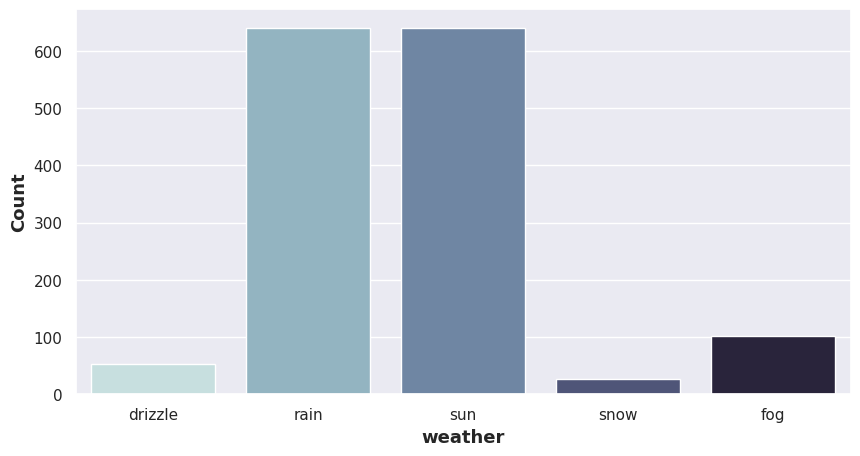

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x='weather', data=data, palette="ch:start=.2,rot=-.3")
plt.xlabel("weather", fontweight='bold', size=13)
plt.ylabel("Count", fontweight='bold', size=13)
plt.show()


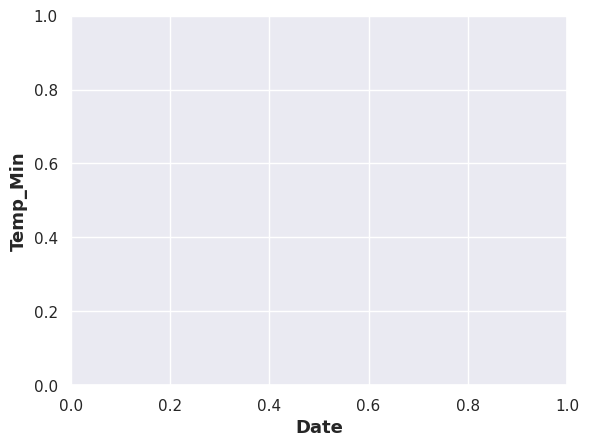

In [ ]:
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Min", fontweight='bold', size=13)
plt.show()

MINIMUM AND MAXIMUM TEMPERATURE WITH DATE

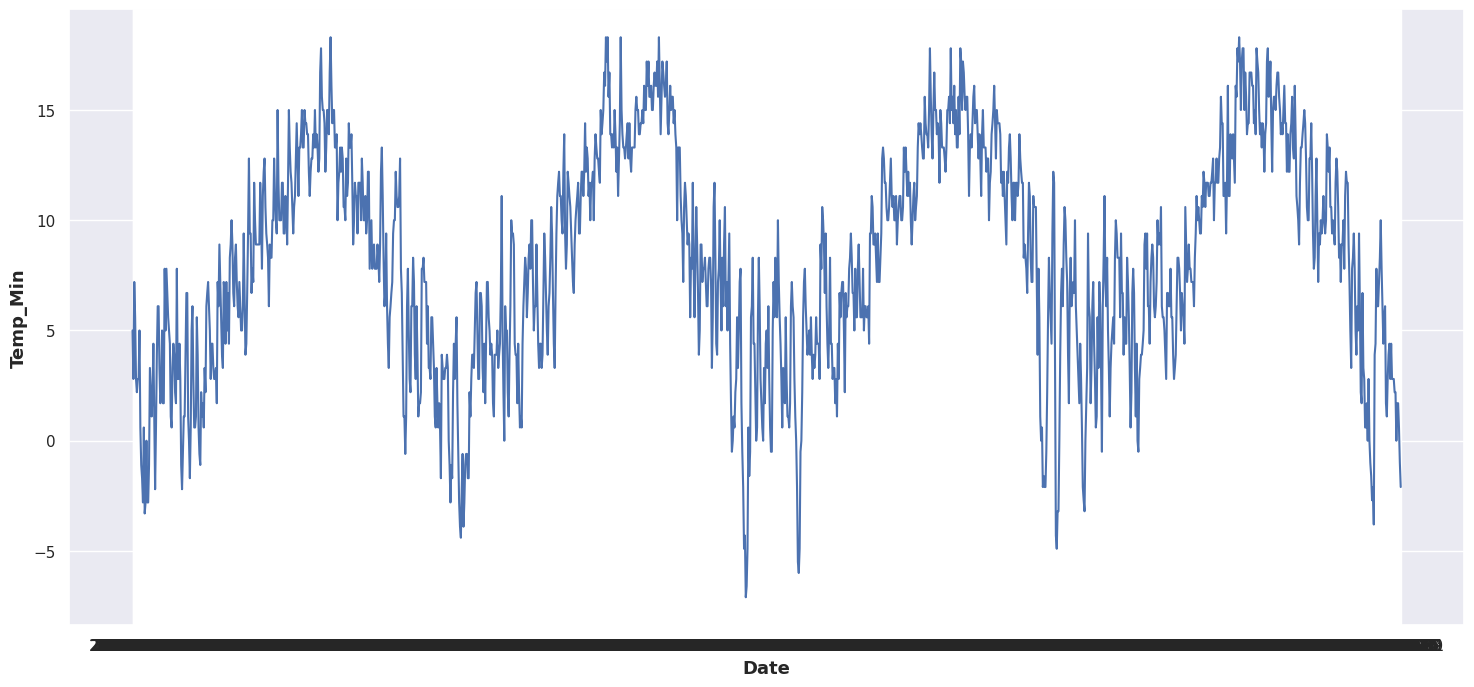

In [ ]:
plt.figure(figsize=(18,8))
sns.set_theme()
sns.lineplot(x='date', y='temp_min', data=data)
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("Temp_Min", fontweight='bold', size=13)
plt.show()


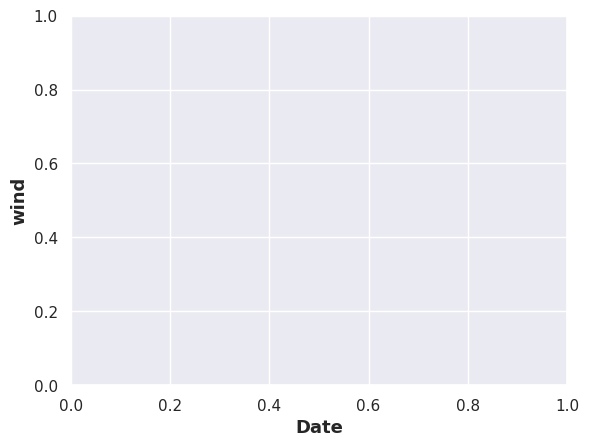

In [ ]:
plt.xlabel("Date", fontweight='bold', size=13)
plt.ylabel("wind", fontweight='bold', size=13)
plt.show()

<Figure size 1400x800 with 0 Axes>

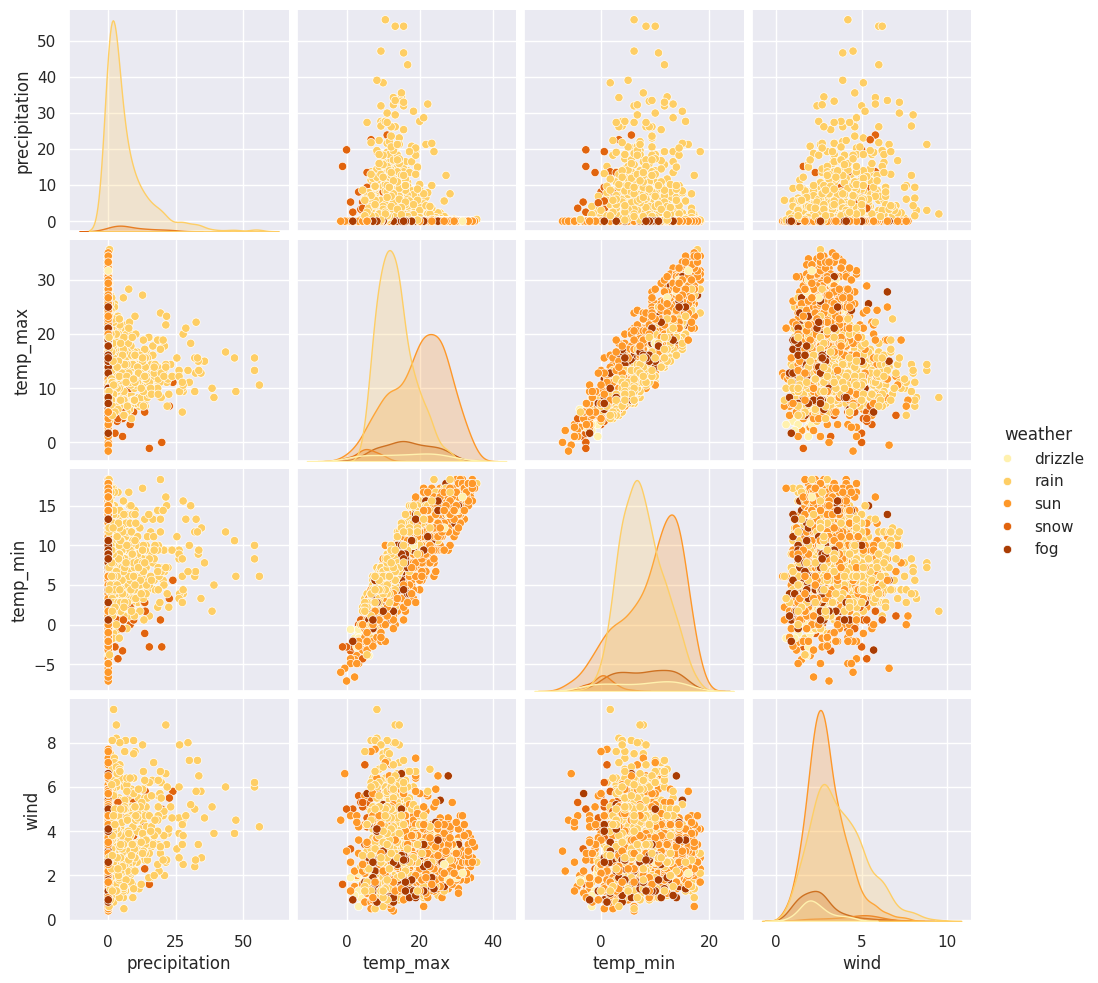

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(data.drop('date',axis=1), hue='weather', palette="YlOrBr")
plt.show()


GRAPH ALONG WIND AND WEATHER

/tmp/ipython-input-3825287412.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y='wind', data=data, palette="magma")


<Figure size 1000x500 with 0 Axes>

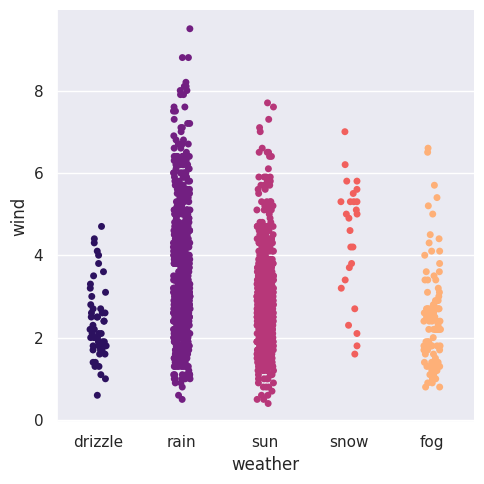

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y='wind', data=data, palette="magma")
plt.show()


WEATHER VS PRECIPITATION

/tmp/ipython-input-1412738071.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y='precipitation', data=data, palette="viridis")


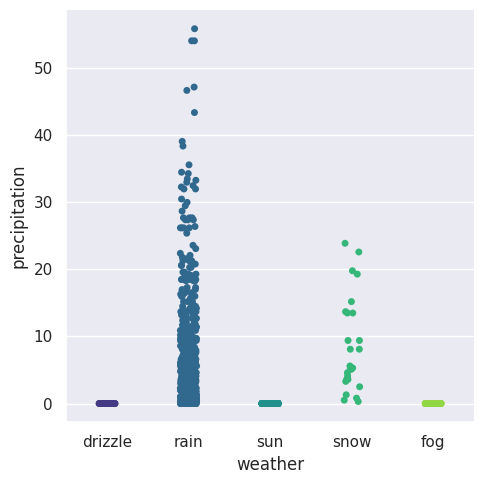

In [ ]:
sns.catplot(x='weather', y='precipitation', data=data, palette="viridis")
plt.show()


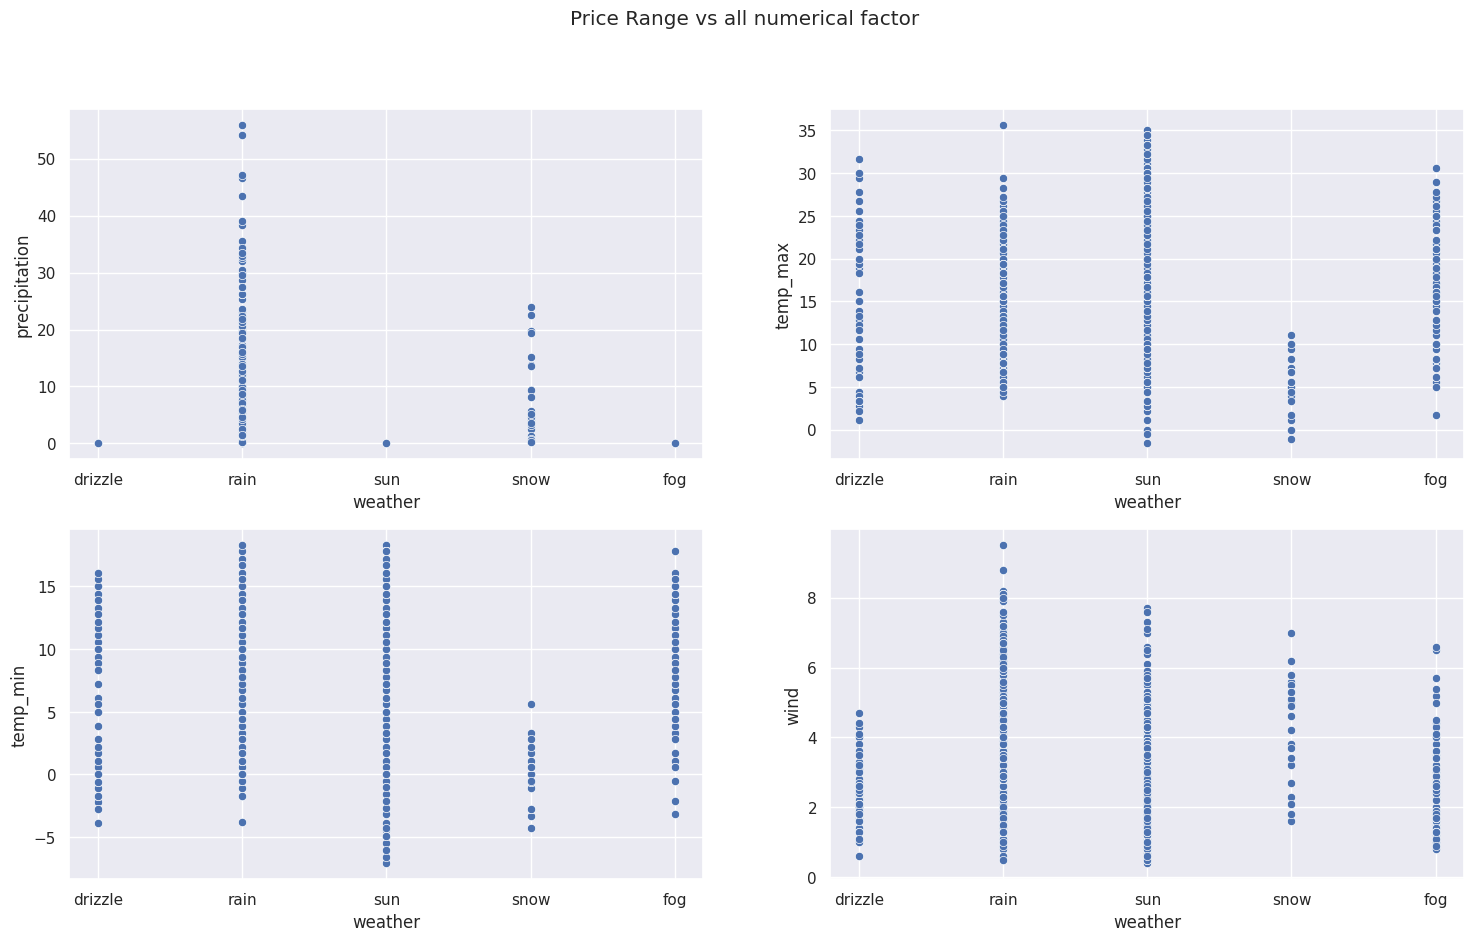

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Price Range vs all numerical factor') # Note: The title seems irrelevant to the data used in the plots (weather factors)

sns.scatterplot(ax=axes[0, 0], data=data, x='weather', y='precipitation')
sns.scatterplot(ax=axes[0, 1], data=data, x='weather', y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x='weather', y='temp_min')
sns.scatterplot(ax=axes[1, 1], data=data, x='weather', y='wind')
plt.show()

SPLITTING DATASET INTO TRAIN AND TEST

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target variable)
# Assuming 'weather' is the target variable and the rest are features
X = data.drop(['weather', 'date'], axis=1) # Dropped 'date' column
y = data['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 5)
(366, 5)
(1095,)
(366,)


USE OF LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
print("\t\tWelcome to the Weather Forecaster!\n\n")
print("Just Enter the City you want the weather report for and click on the button! It's that simple!\n\n")

		Welcome to the Weather Forecaster!


Just Enter the City you want the weather report for and click on the button! It's that simple!




In [ ]:
city_name = input("Enter the name of the City : ")

Enter the name of the City : MUDHOL


In [ ]:
import requests

In [ ]:
# [Continuation of the script]

def Gen_report(C):
    # Construct the API URL using the city name (C)
    url = 'https://wttr.in/{}'.format(C)

    try:
        # Make a GET request to the weather API
        data = requests.get(url)
        # Extract the text content (which includes the formatted weather report)
        T = data.text
    except:
        # Handle potential connection or request errors
        T = "Error Occurred"

    # Print the resulting text (either the report or the error message)
    print(T)

# Call the function using the city name entered earlier (e.g., 'mudhol')
Gen_report(city_name)

Weather report: MUDHOL

     \  /       Partly cloudy
   _ /"".-.     +30(31) °C     
     \_(   ).   ← 17 km/h      
     /(___(__)  10 km          
                0.0 mm         
                                                       ┌─────────────┐                                                       
┌──────────────────────────────┬───────────────────────┤  Mon 24 Nov ├───────────────────────┬──────────────────────────────┐
│            Morning           │             Noon      └──────┬──────┘     Evening           │             Night            │
├──────────────────────────────┼──────────────────────────────┼──────────────────────────────┼──────────────────────────────┤
│     \   /     Sunny          │    \  /       Partly Cloudy  │               Cloudy         │    \  /       Partly Cloudy  │
│      .-.      +26(27) °C     │  _ /"".-.     +30(31) °C     │      .--.     +27(28) °C     │  _ /"".-.     +26(27) °C     │
│   ― (   ) ―   ← 19-22 km/h   │    \_(   ).   ← 18-20 km/h   